In [3]:
from fenics import *
import numpy as np
from mshr import *

In [15]:
b = 1
a = 0.5
nu = 0.1
e_num = 16

In [16]:
x_left = -1.0
x_right = +1.0
mesh = IntervalMesh ( e_num, x_left, x_right )

In [17]:
V = FunctionSpace ( mesh, "CG", 1 )

In [18]:
#  Define the boundary conditions.
#  if X <= XLEFT + eps, then U = U_LEFT
#  if X_RIGHT - eps <= X, then U = U_RIGHT
#
u_left = -1.0
u_right = +1.0

def on_left(x, on_boundary):
    return x[0] <= x_left + DOLFIN_EPS 

def on_right ( x, on_boundary ):
    return x_right - DOLFIN_EPS <= x[0]

bc_left = DirichletBC ( V, u_left, on_left )
bc_right = DirichletBC ( V, u_right, on_right )

bc = [ bc_left, bc_right ]

In [19]:
#  Define the trial functions (u) and test functions (v).
u = Function(V)
v = TestFunction(V)

F = (nu * inner(grad(u), grad(v)) + inner(u*u.dx(0), v)) * dx

#  Specify the jacobian.
J = derivative ( F, u )

#  We use a form of the solve command that recognizes that we are
#  working with a nonlinear equation.
solve ( F == 0, u, bc, J = J )

Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


Calling FFC just-in-time (JIT) compiler, this may take some time.


/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/ffc/uflacs/analysis/dependencies.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  active[targets] = 1


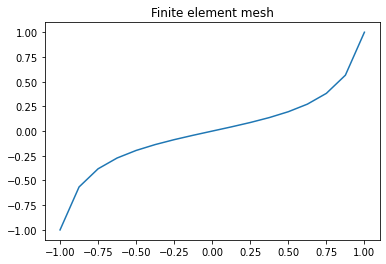

In [28]:
plot(u, title="Finite element mesh")